In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
books = pd.read_csv('top100.csv')

In [168]:
books.head()

,book_id_title,book_id,book_title,book_series,book_series_uri,isbn,isbn13,year_first_published,author,num_pages,genres,shelves,lists,num_ratings,num_reviews,average_rating,rating_distribution
0,10210.Jane_Eyre,10210,Jane Eyre,NaN,NaN,1551111802,9781551111803,1846.0,Charlotte Brontë,532,"['Classics', 'Fiction', 'Romance', 'Historical...","{'to-read': 861870, 'currently-reading': 57625...","{'Best': 197, 'Books': 134, '100': 1603, 'Big'...",1743436,46769,4.13,"{'5 Stars': 805768, '4 Stars': 537570, '3 Star..."
1,10917.My_Sister_s_Keeper,10917,My Sister's Keeper,NaN,NaN,0743486196,9780743486194,2004.0,Jodi Picoult,423,"['Fiction', 'Contemporary', 'Womens Fiction > ...","{'to-read': 268381, 'currently-reading': 7028,...","{'Best': 2065, 'Books': 675, 'The': 222, ""Coul...",1101809,34139,4.08,"{'5 Stars': 447945, '4 Stars': 387514, '3 Star..."
2,10964.Outlander,10964,Outlander,Outlander #1,/series/43943-outlander,0440212561,9780440212560,1991.0,Diana Gabaldon,850,"['Historical > Historical Fiction', 'Romance',...","{'to-read': 586400, 'currently-reading': 59918...","{'Best': 258, 'The': 77, 'Favorite': 182, 'All...",892738,47637,4.23,"{'5 Stars': 488529, '4 Stars': 225164, '3 Star..."
3,11127.The_Chronicles_of_Narnia,11127,The Chronicles of Narnia,The Chronicles of Narnia (Publication Order,/series/49073-the-chronicles-of-narnia-publica...,0060598247,9780060598242,1956.0,C.S. Lewis,767,"['Fantasy', 'Classics', 'Fiction', 'Young Adul...","{'to-read': 213905, 'currently-reading': 13025...","{'Best': 11, 'Books': 21, 'The': 10, 'What': 6...",561302,10847,4.26,"{'5 Stars': 276979, '4 Stars': 180820, '3 Star..."
4,11870085-the-fault-in-our-stars,11870085,The Fault in Our Stars,NaN,NaN,8415594011,9780142424179,NaN,John Green,313,"['Young Adult', 'Romance', 'Fiction', 'Contemp...","{'to-read': 76948, 'currently-reading': 58616,...","{'Best': 235, 'YA': 66, 'TO': 770, 'Books': 99...",3924262,160263,4.18,"{'5 Stars': 1932037, '4 Stars': 1138642, '3 St..."


**Let's check if the data is complete, and whether any imputation would be necessary**

**Let's drop the columns we will not use for EDA**

In [192]:
books1 = books.drop(['book_id_title', 'book_id', 'book_series','book_series_uri', 'isbn', 'isbn13'],axis=1)

In [193]:
books1.describe()

,year_first_published,num_pages,num_ratings,num_reviews,average_rating
count,94.000000,101.000000,1.010000e+02,101.000000,101.000000
mean,1931.191489,446.019802,1.551149e+06,41265.079208,4.120297
std,137.754908,290.998350,1.324234e+06,32415.281657,0.218639
min,800.000000,38.000000,1.174220e+05,1881.000000,3.520000
25%,1922.750000,268.000000,6.841950e+05,18972.000000,3.990000
50%,1961.500000,374.000000,1.120930e+06,31538.000000,4.130000
75%,1992.500000,503.000000,2.053987e+06,56147.000000,4.270000
max,2011.000000,1728.000000,7.764245e+06,178042.000000,4.620000


**Set the default plot size and style**

In [217]:
plt.rcParams["figure.figsize"] = (10, 7)
plt.style.use('ggplot')

**Let's look at the 10 oldest publications just to whet our appetite**

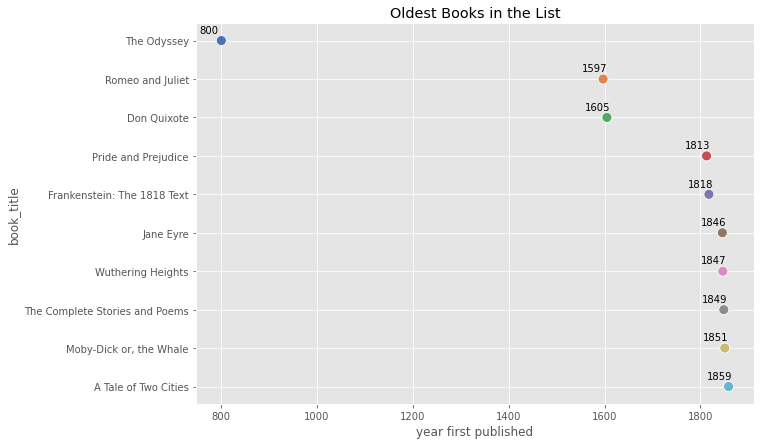

In [269]:
oldestdf = books1.sort_values('year_first_published').head(10)[['book_title','year_first_published']]
oldestplot = sns.scatterplot(y='book_title',x='year_first_published',data=oldestdf,hue='book_title',palette='deep',legend=False,s=100)
for i,year in enumerate(oldestdf['year_first_published']):
    plt.annotate(format(year,'.0f'),(year-45,i-0.2))
plt.xlabel('year first published')
plt.title('Oldest Books in the List')
plt.show()

Hmm.. The Odyssey seems to be the oldest book by some distance. 

**Let's now check the distributions of a few of the columns**

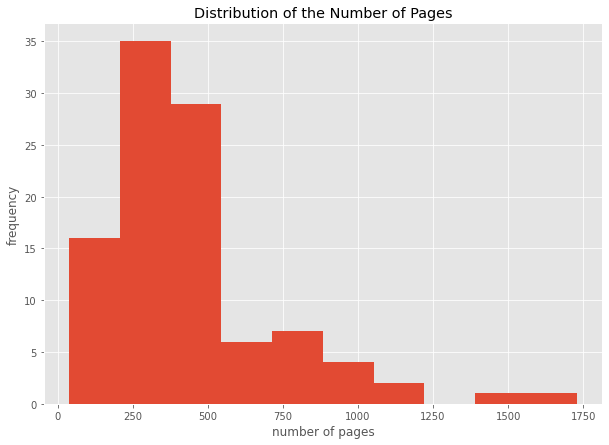

In [270]:
#Distribution of the number of pages
books1['num_pages'].hist()
plt.title('Distribution of the Number of Pages')
plt.xlabel('number of pages')
plt.ylabel('frequency')
plt.show()

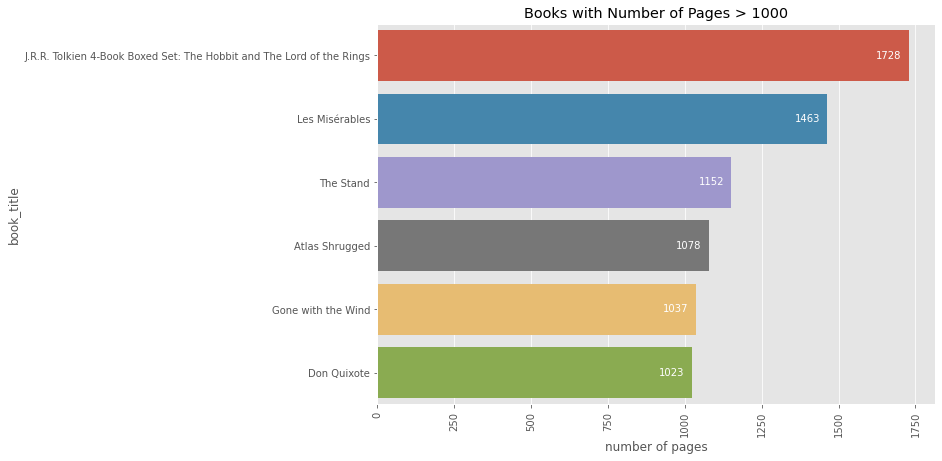

In [272]:
#Let's see which books have page number more than 1000
pgdf = books1[books1['num_pages'] > 1000].sort_values('num_pages',ascending=False)
pgplot = sns.barplot(y='book_title',x='num_pages',data=pgdf)
for p in pgplot.patches:
    pgplot.annotate(format(p.get_width(), '.0f'), 
                   (p.get_width(), p.get_y()), 
                   ha = 'center', va = 'center', 
                   xytext = (-20, -25), 
                   textcoords = 'offset points',
                   color='white')
plt.xticks(rotation=90)
plt.title('Books with Number of Pages > 1000')
plt.xlabel('number of pages')
plt.show()

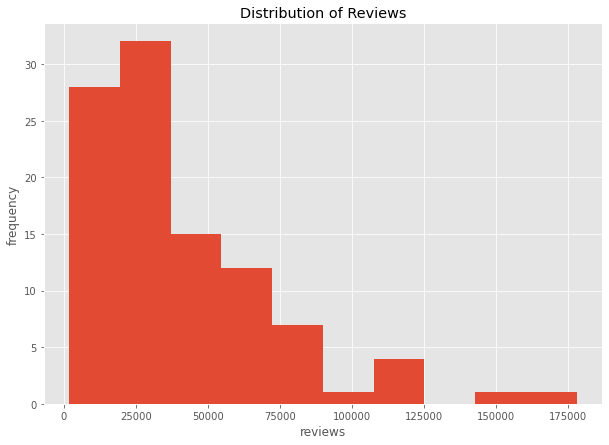

In [189]:
#Distribution of the number of reviews
books['num_reviews'].hist()
plt.title('Distribution of Reviews')
plt.xlabel('reviews')
plt.ylabel('frequency')
plt.show()

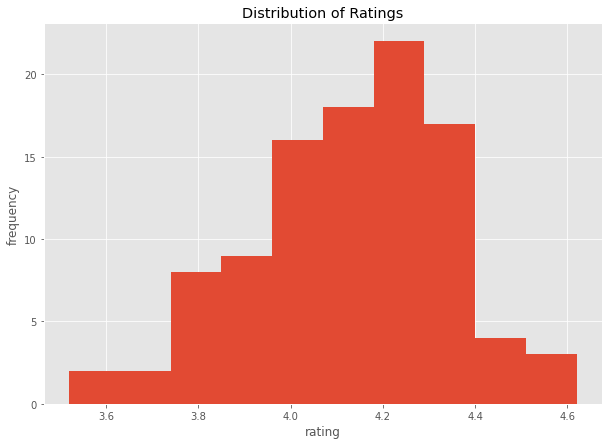

In [190]:
# Distribution of rating
books['average_rating'].hist()
plt.title('Distribution of Ratings')
plt.xlabel('rating')
plt.ylabel('frequency')
plt.show()
plt.show()

**Top ten books sorted by average rating**

In [163]:
# check the top 10 books with the highest average rating
books1.sort_values('average_rating',ascending=False)[['book_title','average_rating','num_ratings','num_reviews']].head(10)

,book_title,average_rating,num_ratings,num_reviews
11,Harry Potter and the Deathly Hallows,4.62,3041745,70066
51,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,4.60,117422,1881
79,Harry Potter and the Prisoner of Azkaban,4.57,3119142,61569
31,Harry Potter and the Order of the Phoenix,4.50,2732458,47062
50,Harry Potter and the Sorcerer's Stone,4.47,7764245,122784
75,The Help,4.46,2317860,85942
10,A Game of Thrones,4.44,2129544,56147
7,A Thousand Splendid Suns,4.39,1241293,58304
27,The Book Thief,4.38,2009965,119438
53,The Fellowship of the Ring,4.37,2485297,25932


**Top ten books sorted by the number of ratings**

In [191]:
# check the top 10 books with the most number of ratings
books1.sort_values('num_ratings',ascending=False)[['book_title','num_ratings','num_reviews','average_rating']].head(10)

,book_title,num_ratings,num_reviews,average_rating
50,Harry Potter and the Sorcerer's Stone,7764245,122784,4.47
46,The Hunger Games,6872968,178042,4.32
69,Twilight,5346273,109209,3.61
45,To Kill a Mockingbird,4890905,97382,4.28
76,The Great Gatsby,4099589,74641,3.93
4,The Fault in Our Stars,3924262,160263,4.18
67,1984,3484018,79536,4.19
26,Pride and Prejudice,3298397,77023,4.27
9,Divergent,3175437,110735,4.18
79,Harry Potter and the Prisoner of Azkaban,3119142,61569,4.57


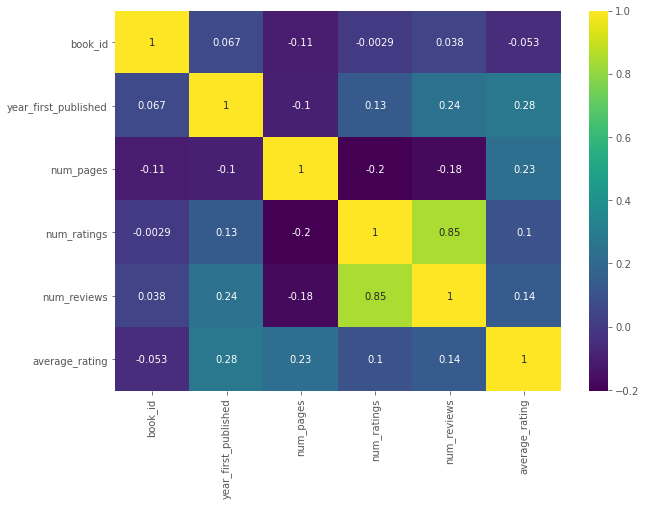

In [157]:
# check for correlation with year_first_published, num_ratings and average rating
sns.heatmap(books.corr(),annot=True,cmap='viridis')
plt.show()

**The genres column is a list of genres a book belongs to. Let's look at the most popular genres**

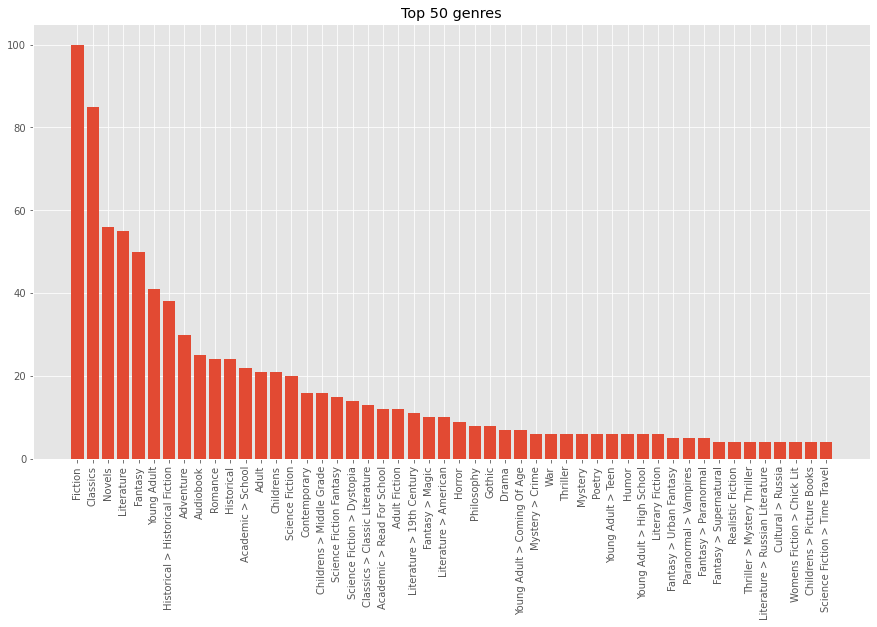

In [188]:
from collections import Counter

# Let's make a list which contains ALL the genres 
genre = []
for i in range(0,books.shape[0]):
    row_genre = eval(books.iloc[i]['genres'])
    genre = genre + row_genre

topgenredf = pd.DataFrame.from_dict((Counter(genre)),orient='index')
topgenredf.columns=['count']
#filter to get just the top genres
maxgenres = 50
genrefilt = topgenredf.sort_values('count',ascending=False)[:maxgenres]
plt.figure(figsize=(15,8))
plt.bar(x=genrefilt.index,height=genrefilt['count'])
plt.xticks(rotation=90)
plt.title(f'Top {maxgenres} genres')
plt.show()

**Let's make a dataframe of all the genres**

In [185]:
# 'genre' is a list with all the genres, meaning it has duplicate values
len(genre)

1010

In [186]:
# We will convert it to a set to remove duplicates
unique_genres = set(genre)
genredf = pd.DataFrame(np.zeros((books1.shape[0],len(unique_genres))),columns=sorted(unique_genres))
genredf

,Academic > Read For School,Academic > School,Action,Adult,Adult Fiction,Adventure,Animals,Apocalyptic > Post Apocalyptic,Audiobook,Autobiography > Memoir,...,War,War > World War II,Womens Fiction > Chick Lit,World War II > Holocaust,Writing > Books About Books,Young Adult,Young Adult > Coming Of Age,Young Adult > High School,Young Adult > Teen,Young Adult > Young Adult Fantasy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
for i in range(books1.shape[0]):
    for g in eval(books1.iloc[i]['genres']):
        print(i,g)
        genredf.iloc[i][g] = 1
    print()

0 Classics
0 Fiction
0 Romance
0 Historical > Historical Fiction
0 Gothic
0 Literature
0 Historical
0 Literature > 19th Century
0 Academic > School
0 Classics > Classic Literature

1 Fiction
1 Contemporary
1 Womens Fiction > Chick Lit
1 Young Adult
1 Drama
1 Adult
1 Adult Fiction
1 Realistic Fiction
1 Family
1 Novels

2 Historical > Historical Fiction
2 Romance
2 Fantasy
2 Fiction
2 Science Fiction > Time Travel
2 Historical
2 Romance > Historical Romance
2 Adult
2 Audiobook
2 Cultural > Scotland

3 Fantasy
3 Classics
3 Fiction
3 Young Adult
3 Childrens
3 Christian
3 Adventure
3 Childrens > Middle Grade
3 Science Fiction Fantasy
3 Christian Fiction

4 Young Adult
4 Romance
4 Fiction
4 Contemporary
4 Realistic Fiction
4 Young Adult > Teen
4 Young Adult > Coming Of Age
4 Novels
4 Drama
4 Love

5 Fantasy
5 Young Adult
5 Fiction
5 Childrens
5 Adventure
5 Science Fiction
5 Childrens > Middle Grade
5 Science Fiction Fantasy
5 Science Fiction > Steampunk
5 Classics

6 Fiction
6 Mystery
6 Youn

100 Childrens
100 Fiction
100 Fantasy
100 Animals
100 Childrens > Picture Books
100 Young Adult
100 Audiobook
100 Childrens > Middle Grade
100 Childrens > Juvenile



In [117]:
genredf.iloc[0]

Academic > Read For School           0.0
Academic > School                    1.0
Action                               0.0
Adult                                0.0
Adult Fiction                        0.0
                                    ... 
Young Adult                          0.0
Young Adult > Coming Of Age          0.0
Young Adult > High School            0.0
Young Adult > Teen                   0.0
Young Adult > Young Adult Fantasy    0.0
Name: 0, Length: 129, dtype: float64

In [120]:
books.iloc[0]['genres']

"['Classics', 'Fiction', 'Romance', 'Historical > Historical Fiction', 'Gothic', 'Literature', 'Historical', 'Literature > 19th Century', 'Academic > School', 'Classics > Classic Literature']"

In [34]:
books1.columns

Index(['book_title', 'year_first_published', 'author', 'num_pages', 'genres',
       'shelves', 'lists', 'num_ratings', 'num_reviews', 'average_rating',
       'rating_distribution'],
      dtype='object')

In [ ]:
# check for books with the most number of ratings
# find the top author per genre
# find the highest rated book of authors with more than one book